# Color Space Tutorial
*Reference*:
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
- https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv
- https://stackoverflow.com/questions/25398188/black-color-object-detection-hsv-range-in-opencv

For black and white colors in HSV range you have to set hue at maximum range (0 to 180), and saturation at maximum range (0 to 255). You can play with the value, for example, 0 to 30 or 40 for black, and 200 to 255 for white.

In [1]:
# // for black
# cvInRangeS(imgHSV, cvScalar(0, 0, 0, 0), cvScalar(180, 255, 30, 0), imgThreshold);

# // for white
# cvInRangeS(imgHSV, cvScalar(0, 0, 200, 0), cvScalar(180, 255, 255, 0), imgThreshold);


In [103]:
import cv2
import numpy as np
from skimage import io

In [64]:
colors = ["black","white"]
hues = [0,0]

In [65]:
red = 15
colors.append("red")
hues.append(red)

orange = red_hue + 10 #25
colors.append("orange")
hues.append(orange)

yellow = orange + 10 #35
colors.append("yellow")
hues.append(yellow)

green = yellow + 40 #75
colors.append("green")
hues.append(green)

light_blue = green + 20 #95
colors.append("light_blue")
hues.append(light_blue)

navy_blue = light_blue + 35 #130
colors.append("navy_blue")
hues.append(navy_blue)

purple = navy_blue + 15 #145
colors.append("purple")
hues.append(purple)

pink = purple + 15 #160
colors.append("pink")
hues.append(pink)

print(len(colors))
print(colors)
print(len(hues))
print(hues)


10
['black', 'white', 'red', 'orange', 'yellow', 'green', 'light_blue', 'navy_blue', 'purple', 'pink']
10
[0, 0, 15, 25, 35, 75, 95, 130, 145, 160]


In [80]:
def getColor(hsv_sample):
    hue = hsv_sample[0]
    sat = hsv_sample[1]
    val = hsv_sample[2]
    
    if val < 30: return 0 # black
    if val > 200: return 1 # white
    
    #start from red
    for index, color_hue in enumerate(hues):
        if hue < color_hue: return index
    
    return 2 #return red

In [92]:
sample_color = np.array([0,50,50])
print(colors[getColor(sample_color)])


sample_color = np.array([20,50,150])
print(colors[getColor(sample_color)])

sample_color = np.array([30,150,50])
print(colors[getColor(sample_color)])

sample_color = np.array([60,100,50])
print(colors[getColor(sample_color)])

sample_color = np.array([80,230,80])
print(colors[getColor(sample_color)])

sample_color = np.array([100,250,50])
print(colors[getColor(sample_color)])

sample_color = np.array([140,250,50])
print(colors[getColor(sample_color)])

sample_color = np.array([150,250,150])
print(colors[getColor(sample_color)])

sample_color = np.array([170,250,150])
print(colors[getColor(sample_color)])

sample_color = np.array([150,250,20])
print(colors[getColor(sample_color)])
sample_color = np.array([150,250,250])
print(colors[getColor(sample_color)])

red
orange
yellow
green
light_blue
navy_blue
purple
pink
red
black
white


In [127]:
image_path = 'testImage/test1.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
rgb_hsv = cv2.cvtColor(hsv,cv2.COLOR_BGR2RGB) #to show on matplotlib

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])

# Threshold the HSV image to get only red colors
mask = cv2.inRange(hsv, lower_red, upper_red)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
flat_hsv = hsv.reshape(-1,3)
flat_hsv[:2]

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [25]:
x = np.array([1, 2, 3, 4, 5])
squarer = lambda t: t ** 2
vfunc = np.vectorize(squarer)
vfunc(x)

array([ 1,  4,  9, 16, 25])

In [98]:
hsv_samples = np.array([[35,215,120],[12,8,150]])
mapColor = np.array([getColor(sample) for sample in hsv_samples])
mapColor

array([5, 2])

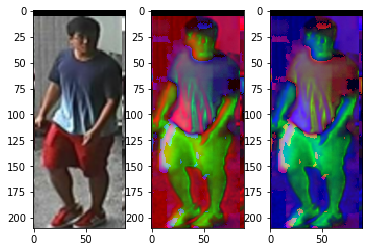

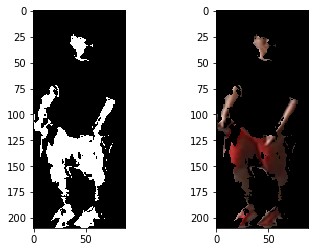

In [101]:
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(rgb_hsv)
plt.subplot(1, 3, 3)
plt.imshow(hsv)
plt.show()
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

(30, 89, 3)


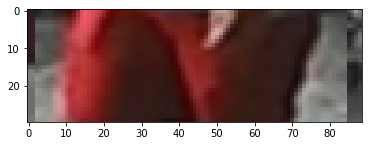

In [114]:
img = io.imread(image_path)[120:150, :, :-1]
print(img.shape)
plt.imshow(img)

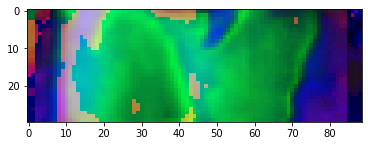

In [119]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

In [124]:
flat_hsv = hsv.reshape(-1,3)
flat_hsv[:2]
mapColor = np.array([getColor(sample) for sample in flat_hsv])
print(mapColor)
print(mapColor.shape)

[2 2 7 ... 2 2 2]
(2670,)


In [126]:
(values,counts) = np.unique(mapColor,return_counts=True)
print(values)
print(counts)
dominantColor = np.argmax(counts)
print(colors[dominantColor])

[0 1 2 3 4 5 6 7 9]
[  17   50 2199   59   86  216   28   12    3]
red


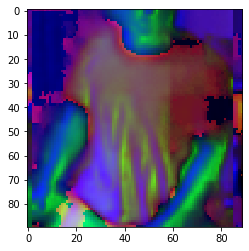

In [133]:
body = hsv[30:120, :, :]
plt.imshow(body)
plt.show()

In [136]:
def getDominantColor(hsv_samples):
    flat_hsv = hsv_samples.reshape(-1,3)
    mapColor = np.array([getColor(sample) for sample in flat_hsv])
    (values,counts) = np.unique(mapColor,return_counts=True)
    print(counts)
    dominantColor = np.argmax(counts)
    return colors[dominantColor]

In [137]:
getDominantColor(body)

[ 208  451 2358  297  263  883  440 2996   50   64]


'navy_blue'

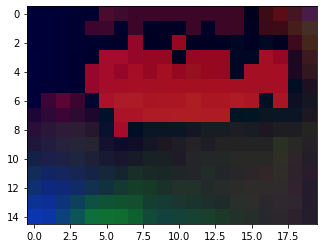

In [147]:
head = hsv[10:25, 40:60, :]
plt.imshow(head)
plt.show()

In [148]:
getDominantColor(head)

[  8 118  42  36  77   2  17]


'white'

In [149]:
image_path = 'testImage/test2.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

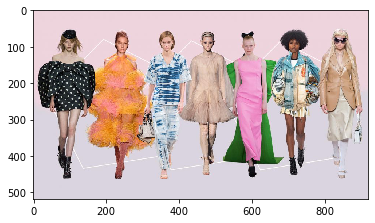

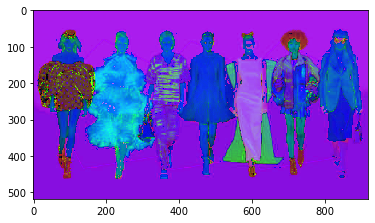

In [153]:
plt.imshow(img)
plt.show()
plt.imshow(hsv)
plt.show()

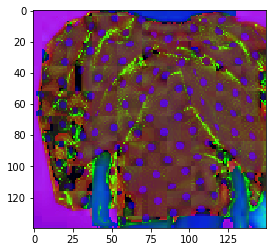

In [155]:
person1 = hsv[140:280, 10:160, :]
plt.imshow(person1)
plt.show()

In [156]:
getDominantColor(person1)

[5092 2713 1752  138  136  691 2016 8227   99  136]


'navy_blue'

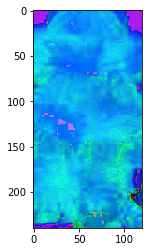

[   11 25220  2795   751     8     4     1     5     3     2]


'white'

In [157]:
person2 = hsv[140:380, 180:300, :]
plt.imshow(person2)
plt.show()
getDominantColor(person2)

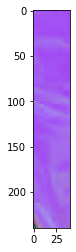

[9497   96    3    1    3]


'black'

In [158]:
person5 = hsv[140:380, 580:620, :]
plt.imshow(person5)
plt.show()
getDominantColor(person5)

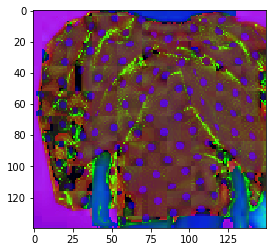

[5092 2713 1752  138  136  691 2016 8227   99  136]


'navy_blue'

In [160]:
person1 = hsv[140:280, 10:160, :]
plt.imshow(person1)
plt.show()
getDominantColor(person1)